In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from glob import glob
from scipy.stats import gaussian_kde

In [2]:
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import compjk, safe_mkdir

In [4]:
root_data_dir = join(root_dir, 'Data')
spectral_dir = join(root_data_dir, 'Spectral-Class-v')
spectral_files = glob(join(spectral_dir, '*.hdf5'))
spectral_files.sort()
spectral_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321

In [5]:
name = "Effective-Completeness-v"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness-v already exist. Good to go!


# testing

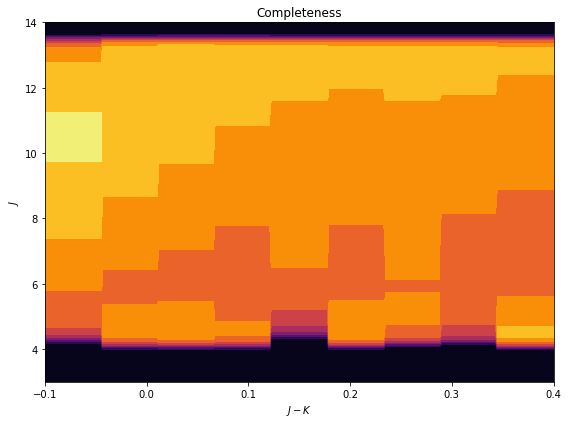

In [16]:
j = np.linspace(3, 14, 300)
jk = np.linspace(-0.1, 0.4, 300)
K, J = np.meshgrid(jk, j)

comp = np.empty_like(K)
for i, (j, jk) in enumerate(zip(J, K)):
    comp[i] = compjk(j, jk)

fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(K, J, comp, levels=np.linspace(0, 1, 11), cmap='inferno')
ax.set_xlabel(r'$J-K$')
ax.set_ylabel(r'$J$')
ax.set_title('Completeness')
fig.tight_layout()

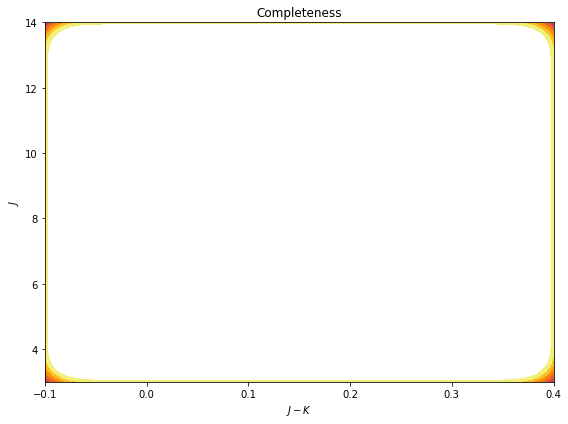

In [17]:
# 2D gaussian kernel density estimation
from scipy.stats import gaussian_kde

def kde2d(x, y, xbins=100j, ybins=100j, **kwargs):
    """Calculate the 2D kernel density estimate on a regular grid"""
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    xi, yi = np.mgrid[x.min():x.max():xbins, y.min():y.max():ybins]
    zi = interpolate.griddata((x, y), z, (xi, yi), method='cubic')

    return xi, yi, zi

xi, yi, zi = kde2d(K.flatten(), J.flatten(), xbins=300j, ybins=300j)

fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(xi, yi, zi, levels=np.linspace(0, 0.1, 11), cmap='inferno')
ax.set_xlabel(r'$J-K$')
ax.set_ylabel(r'$J$')
ax.set_title('Completeness')
fig.tight_layout()


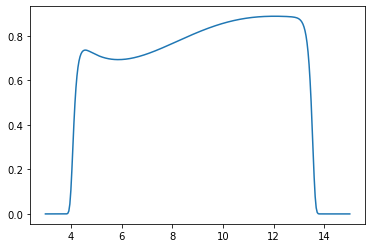

In [10]:
J = np.linspace(3, 15, 300)
JK = np.repeat(0.01, len(J))

comp = compjk(J, JK)

plt.plot(J, comp)


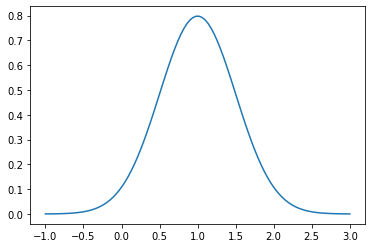

In [40]:
from scipy.stats import norm
def xi(MJ):
    return norm.pdf(MJ, 1, 0.5)

mj = np.linspace(-1, 3, 100)
plt.plot(mj, xi(mj))


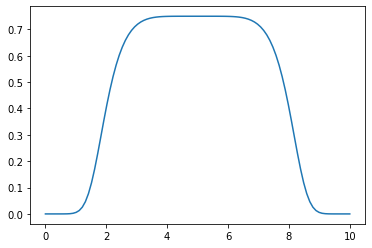

In [42]:
def S_comp(DM):
    return 1.5/(1+np.exp(np.power((DM-5)/3, 6)))

dm = np.linspace(0, 10, 100)
plt.plot(dm, S_comp(dm))


<ipython-input-42-43960cd7a239>:2: RuntimeWarning: overflow encountered in exp
  return 1.5/(1+np.exp(np.power((DM-5)/3, 6)))


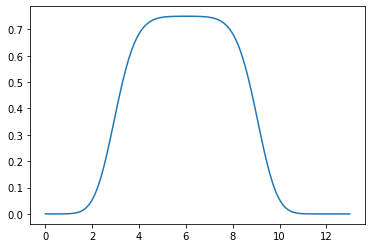

In [47]:
j = np.linspace(0, 13, 100)
j_comp = np.empty_like(j)
xi_ex = xi(mj)
dmj = mj[1] - mj[0]
for i, ji in enumerate(j):
    s_ex = S_comp(ji-mj)
    j_ex = s_ex*xi_ex*dmj
    j_comp[i] = np.sum(j_ex)

plt.plot(j, j_comp)

In [ ]:
dm = np.linspace(0, 10, 100)
s_comp = np.empty_like(j)
xi_ex = xi(mj)
dmj = mj[1] - mj[0]
for i, dmi in enumerate(dm):
    s_ex = S_comp(ji-mj)
    j_ex = s_ex*xi_ex*dmj
    j_comp[i] = np.sum(j_ex)

plt.plot(j, j_comp)

# load clean data

ex. first file

In [6]:
index = 0
gaia = vaex.open(spectral_files[index])
gaia = gaia.filter("abs(z) > 50").filter("abs(z) < 200")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.01893012031981082,-0.5108379054920975,6.277,6.259,AAA,2320998853585525632,28.922136,28.746592113258906,0.037988756,3.1817298307613178,0.028571008,7.764007366118098,0.038006753,6.3724885,6.3706307,6.3363557,1358.1975,907.6332,0.8963502,1.1616378,-2.8182311335440513,-1.3859559776113197,128.1762,127.534,128.8183,0.0353,0.0304,0.0398,,--,nan,nan,--,9174.2216796875,26.9609375,25.3583984375,0.0,gspphot,3.8515000343322754,0.0055999755859375,0.0055999755859375,1.0,gspphot,-0.7299000024795532,0.00019997358322143555,0.00019997358322143555,1.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.018000126,0.7274296441804928,128.7994656424427,-126.6054447098116,23.672002864346208,-1.2659550057747964,-28.89441677496518,0.0288280254070827,0.03779408693818491,-17.6403149887547,-0.7728775160053423,-0.08938323110670679,-0.018001851870113685,nan,nan,nan,nan,nan,nan,nan,nan,0.4762351297583041,1.899158716421745
1,0.043792963833000756,0.1945312044747568,5.64,5.7,AAA,2753834422041820928,31.604261,31.492858473767534,0.099849366,2.651272358338685,0.08910748,11.059206610763137,0.08457987,5.5380197,5.4955716,5.58349,697.066,637.48376,0.7301344,1.1578026,-1.2764030906818413,-0.8801714069742556,94.5117,93.5055,96.0428,0.0007,1e-04,0.0017,B,--,nan,nan,--,11125.865234375,29.998046875,106.2314453125,0.0,gspphot,4.067699909210205,0.02670001983642578,0.011400222778320312,0.0,gspphot,-0.7979999780654907,0.6416000127792358,0.022099971771240234,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-0.059999943,0.8586197251414553,90.42239965268135,-69.70193313647873,57.600788848652726,31.1500711194924,-5.338768511314951,0.0992068792352901,0.0898222387356052,-2.2882077923207054,13.350988213087136,-0.04228885396262224,0.11060677673022579,nan,nan,nan,nan,nan,nan,nan,nan,0.19727133562210553,1.607035791233654
2,0.0650519467869177,-0.16702041723361116,5.93,5.941,AAA,2428341184508675456,22.533598,20.3783362162242,0.08197974,-9.616989691534444,0.04513643,9.19004837232794,0.07620025,5.758081,5.7091775,5.8137174,1185.3661,1130.142,1.0631398,1.1585377,-1.4824195035429235,-1.2293900062540744,117.0931,115.6476,118.9459,0.0003,0.0,0.0009,B,--,nan,nan,--,11489.6181640625,134.703125,29.923828125,0.0,gspphot,4.041299819946289,0.011499881744384766,0.011700153350830078,0.0,gspphot,-0.7656999826431274,0.09589999914169312,0.35649996995925903,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-0.011000156,0.7465888149643982,108.81335543467755,-102.53316473414941,36.43207996468564,14.418679409229293,-17.316603643971927,0.0767273342657741,0.05358069297570589,-8.931476521884182,7.436798766537333,-0.07904465577586489,0.07326958058541136,nan,nan,nan,nan,nan,nan,nan,nan,0.3687524188326675,1.7739436187545168
3,0.06961613986051554,0.07419626779018411,6.983,7.04,AAA,2741090498161113344,25.06247,20.1504193286354,0.039598886,-14.902617195746732,0.033920143,8.272102429290548,0.035471436,7.1248207,7.129393,7.0852213,1497.6943,2153.4927,0.93814075,1.1587403,-1.286059580170909,-1.0030652032972658,120.6859,120.2234,121.2232,0.149,0.1464,0.1517,A,--,13.484271049499512,0.4841364622116089,gaia,10095.669921875,24.05859375,23.837890625,0.0,gspphot,4.233799934387207,0.0039997100830078125,0.004000186920166016,0.0,gspph

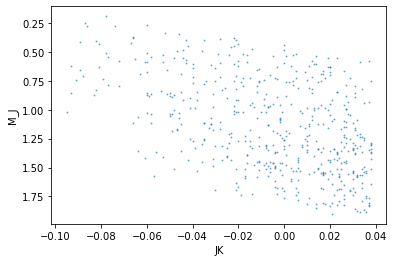

In [7]:
# plot the hr diagram of JK and M_J
gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
xmean = np.mean(gaia['JK'].to_numpy())
xstd = np.std(gaia['JK'].to_numpy())
xrange = xmean - 3*xstd, xmean + 3*xstd
ymean = np.mean(gaia['M_J'].to_numpy())
ystd = np.std(gaia['M_J'].to_numpy())
yrange = ymean - 3*ystd, ymean + 3*ystd
plt.gca().invert_yaxis()


/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log
  fgrid = f(grid)


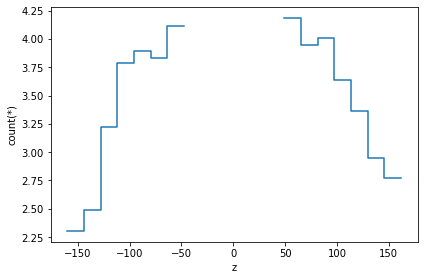

In [8]:
gaia.viz.histogram('z', shape=20, f="log")

In [153]:
# # use scipy kde to estimate the 2D kde estimate of the data
# # cut the middle plane of 30 degree
# gaia_filt = gaia.filter("abs(GLAT) > 30*3.14/180")
# gaia_filt = gaia_filt.extract()
# x = gaia_filt['JK'].to_numpy()
# y = gaia_filt['M_J'].to_numpy()
# k = gaussian_kde(np.vstack([x, y]))
# xi, yi = np.mgrid[-0.2:0.25:100j, -2:4:100j]
# zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [9]:
# use scipy kde to estimate the 2D kde estimate of the data
x = gaia['JK'].to_numpy()
y = gaia['M_J'].to_numpy()
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

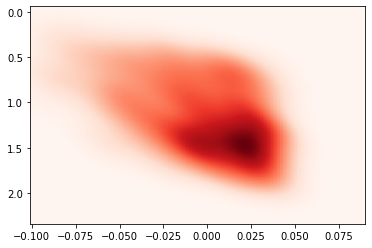

In [10]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
# gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
plt.gca().invert_yaxis()
plt.show()

In [11]:
Num = 10000
jks = np.random.uniform(xrange[0], xrange[1], Num)
mjs = np.random.uniform(yrange[0], yrange[1], Num)
Djk = xrange[1] - xrange[0]
Dmj = yrange[1] - yrange[0]
# do monte carlo integration
z = k(np.vstack([jks, mjs]))*Djk*Dmj/Num
z.sum()

0.9723575909844109

In [12]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


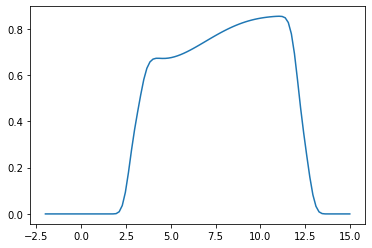

In [13]:
from tqdm import tqdm

DM = np.linspace(-2, 15, 100)

compDM = []
for dm in tqdm(DM):
    tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*compjk(dm + mjs, jks)
    compDM.append(tot.sum())
compDM = np.array(compDM)
plt.plot(DM, compDM)
plt.show()

In [14]:
df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,3.5589153353336103e-112
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


In [15]:
df_comp.export(join(data_dir, spectral_files[index].split("/")[-1]), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [16]:
spectral_files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321

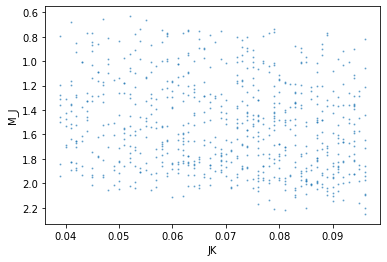

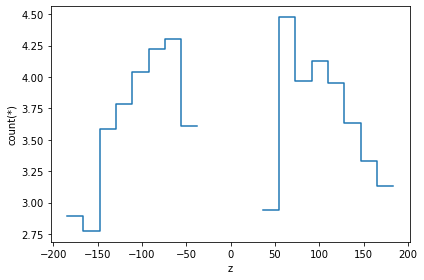

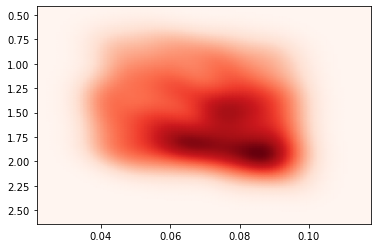

100%|██████████| 100/100 [00:28<00:00,  3.46it/s]


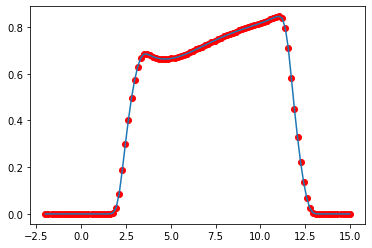

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

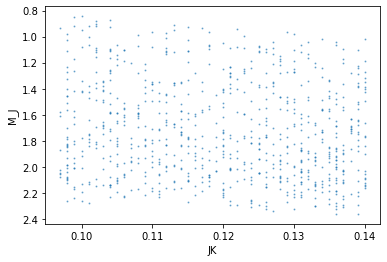

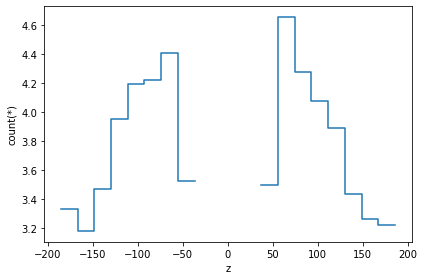

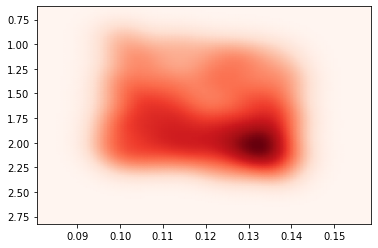

100%|██████████| 100/100 [00:30<00:00,  3.25it/s]


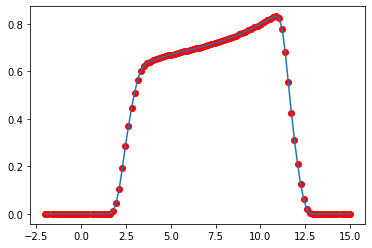

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

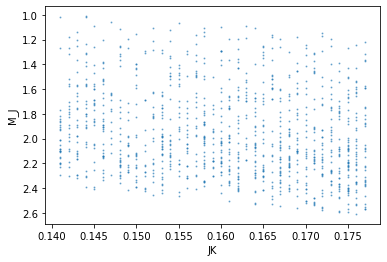

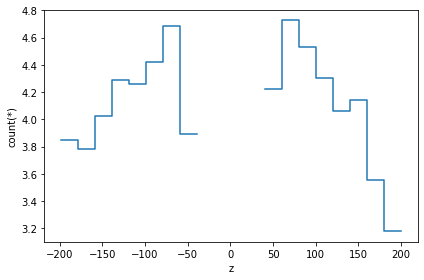

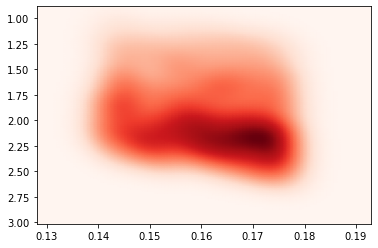

100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


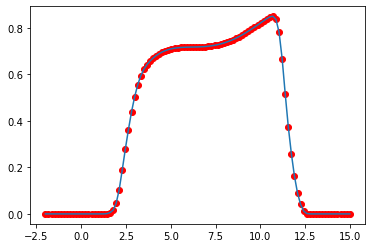

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

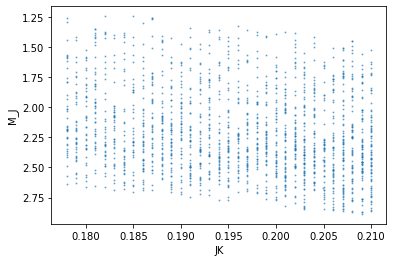

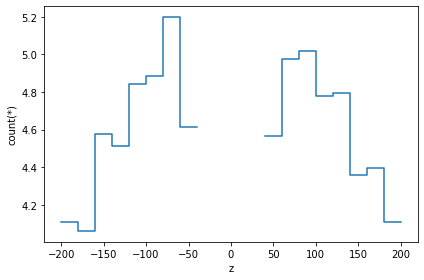

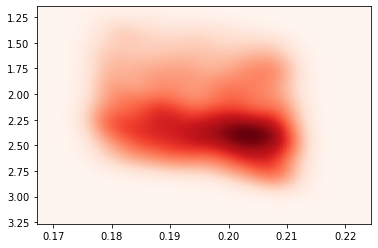

100%|██████████| 100/100 [00:49<00:00,  2.02it/s]


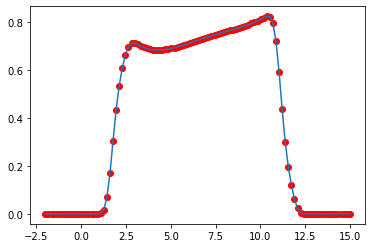

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

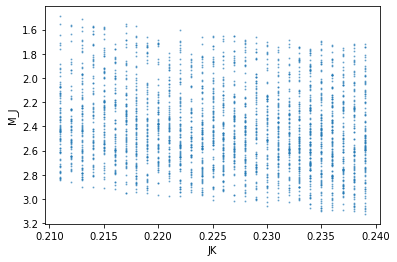

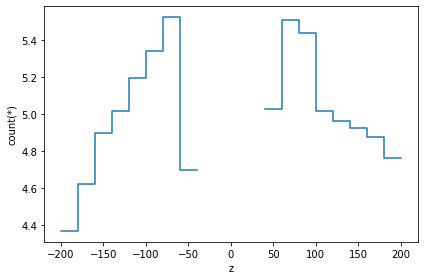

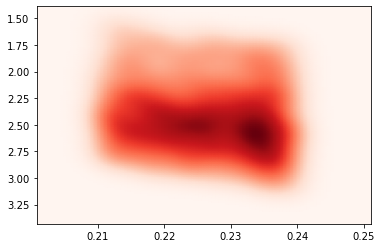

100%|██████████| 100/100 [01:07<00:00,  1.47it/s]


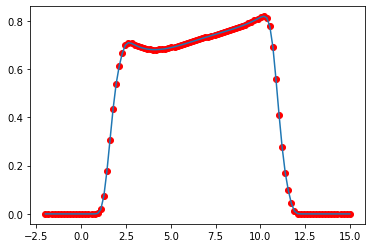

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

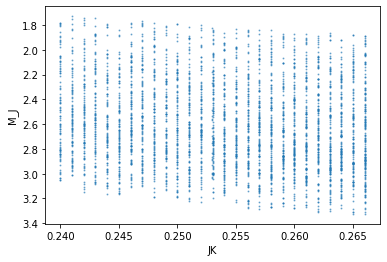

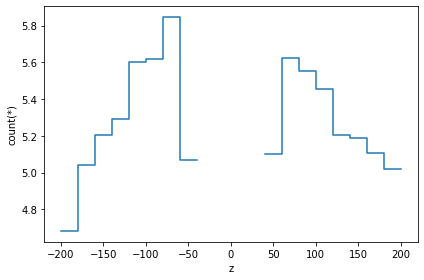

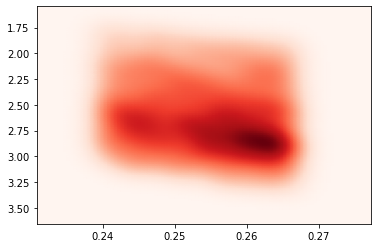

100%|██████████| 100/100 [01:25<00:00,  1.16it/s]


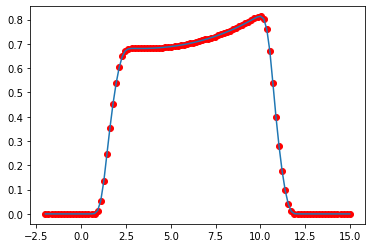

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

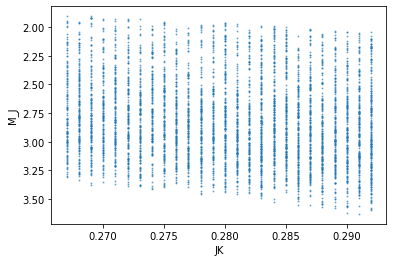

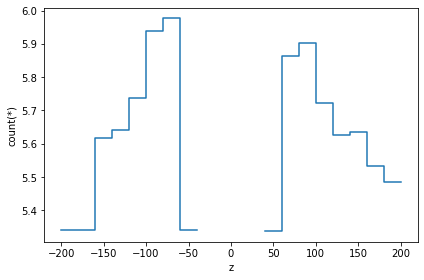

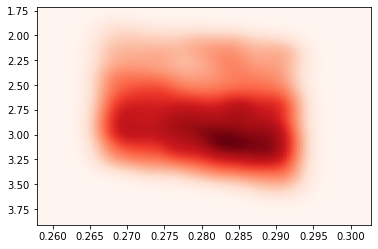

100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


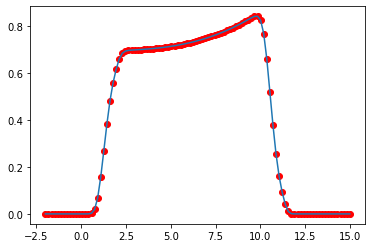

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

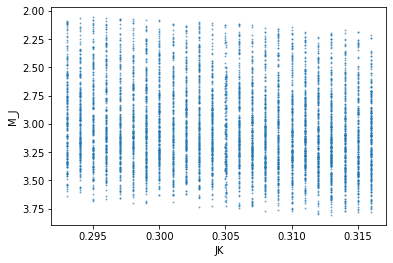

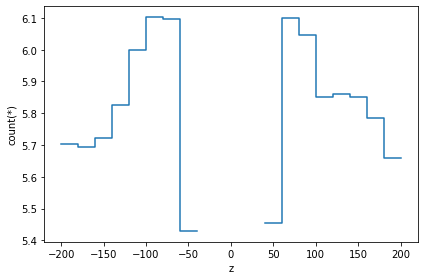

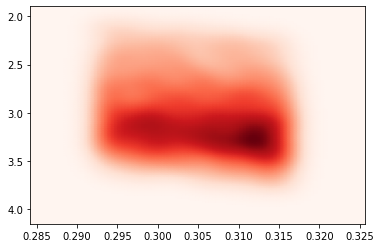

100%|██████████| 100/100 [02:18<00:00,  1.39s/it]


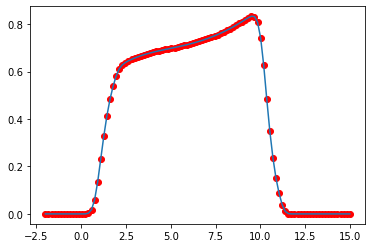

export(hdf5) [########################################] 100.00% elapsed time  :     0.05s =  0.0m =  0.0h
 

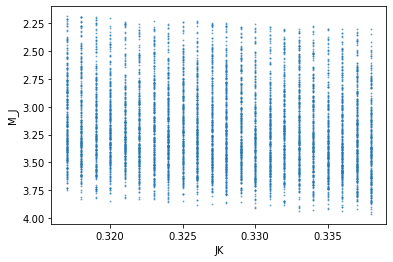

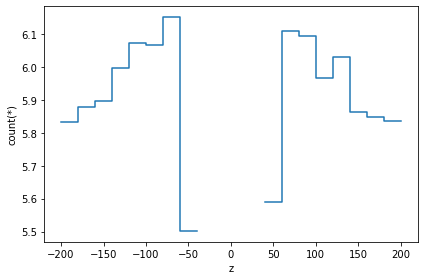

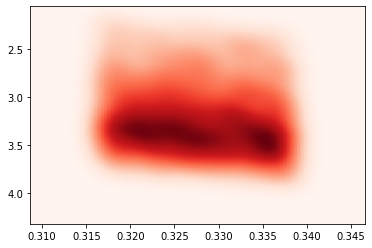

100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


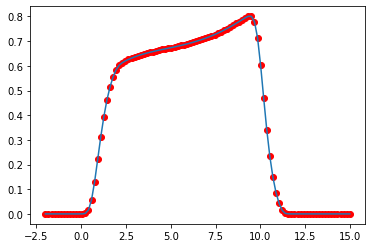

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

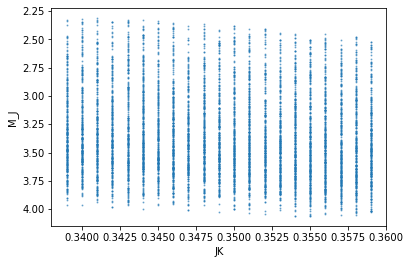

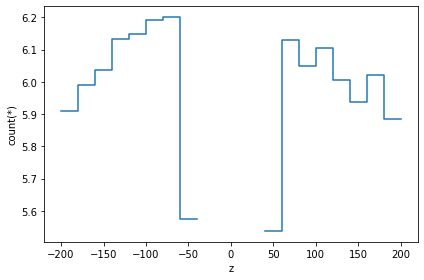

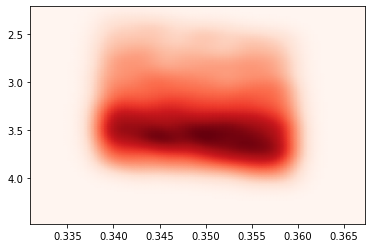

100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


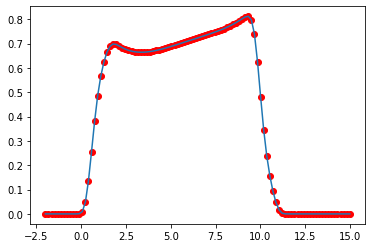

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

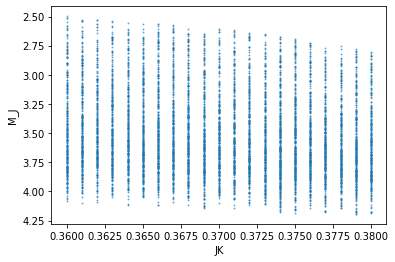

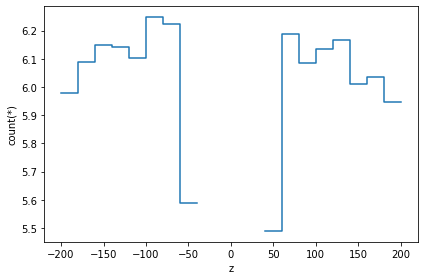

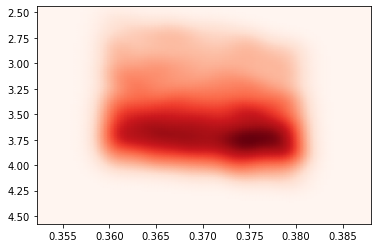

100%|██████████| 100/100 [02:47<00:00,  1.68s/it]


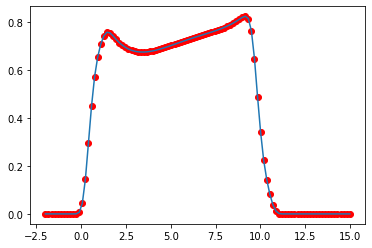

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

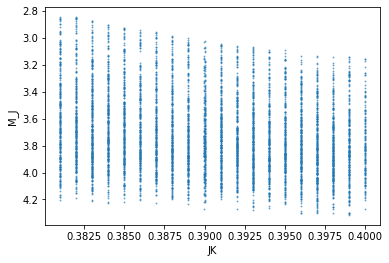

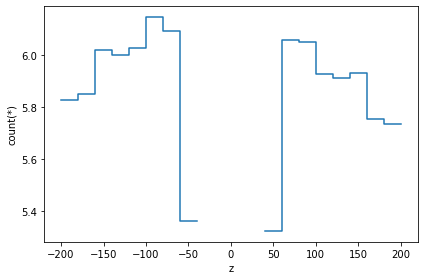

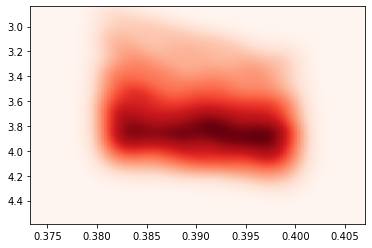

100%|██████████| 100/100 [02:25<00:00,  1.45s/it]


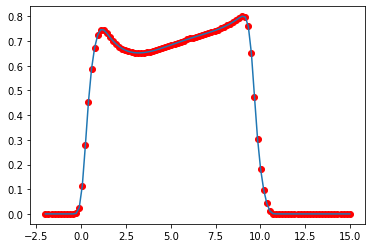

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [17]:
for file in spectral_files[1:]:
    gaia_raw = vaex.open(file)
    gaia = gaia_raw.filter("abs(z) > 50").filter("abs(z) < 200")
    gaia = gaia.extract()

    # plot the hr diagram of JK and M_J
    xmean = np.mean(gaia['JK'].to_numpy())
    xstd = np.std(gaia['JK'].to_numpy())
    xrange = xmean - 3*xstd, xmean + 3*xstd
    ymean = np.mean(gaia['M_J'].to_numpy())
    ystd = np.std(gaia['M_J'].to_numpy())
    yrange = ymean - 3*ystd, ymean + 3*ystd

    gaia.viz.scatter('JK', 'M_J', s=1, alpha=0.5)
    plt.gca().invert_yaxis()
    plt.show()

    gaia.viz.histogram('z', shape=20, f="log", show=True)

    # use scipy kde to estimate the 2D kde estimate of the data
    x = gaia['JK'].to_numpy()
    y = gaia['M_J'].to_numpy()
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[xrange[0]:xrange[1]:100j, yrange[0]:yrange[1]:100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds)
    # gaia_filt.viz.scatter('JK', 'M_J', s=1, alpha=0.1)
    plt.gca().invert_yaxis()
    plt.show()
    # calculate effective completeness, using monte carlo integration

    Num = 10000
    jks = np.random.uniform(xrange[0], xrange[1], Num)
    mjs = np.random.uniform(yrange[0], yrange[1], Num)
    Djk = xrange[1] - xrange[0]
    Dmj = yrange[1] - yrange[0]

    DM = np.linspace(-2, 15, 100)

    compDM = []
    for dm in tqdm(DM):
        tot = k(np.vstack([jks, mjs]))*Djk*Dmj/Num*compjk(dm + mjs, jks)
        compDM.append(tot.sum())
    compDM = np.array(compDM)
    plt.plot(DM, compDM)
    plt.scatter(DM, compDM, c="r")
    plt.show()

    df_comp = vaex.from_arrays(DM=DM, compDM=compDM)
    df_comp.export(join(data_dir, file.split("/")[-1]), progress=True)